# Face Face Recognition Sytem

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
!pip install insightface
!pip install onnxruntime
!pip install onnxruntime-gpu==1.15.1 # Install onnxruntime-gpu (if using GPU)


from insightface.app import FaceAnalysis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.5/439.5 kB 17.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 106.0 MB/s eta 0:00:00
  Created wheel for insightface: filename=insightface-0.7.3-cp311-cp311-linux_x86_64.whl size=1064923 sha256=e5ae78227fb8f61e49af2a95536d4d9187fa366b09560c266b9f2f489015c3f2
  Stored in directory: /root/.cache/pip/wheels/27/d8/22/f52d858d16cd06e7b2e6aad34a1777dcfaf000be833bbf8146
Successfully built insightface
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 70.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.7 MB/s eta 0:00:00


In [2]:

# configure face analysis
faceapp = FaceAnalysis(name='buffalo_sc',
                       root='insightface_model',
                       providers=['CUDAExecutionProvider', 'CPUExecutionProvider'])

faceapp.prepare(ctx_id=0, det_size=(640,640), det_thresh=0.5)
# warning: don't set det_thresh < 0.3

download_path: insightface_model/models/buffalo_sc


100%|██████████| 14619/14619 [00:00<00:00, 26039.05KB/s]


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: insightface_model/models/buffalo_sc/det_500m.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: insightface_model/models/buffalo_sc/w600k_mbf.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


In [3]:
# faceapp.get()

In [10]:
# prompt: drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Extract Facial Features and labels

In [5]:
import re # regular expression

In [11]:
def clean_name(string):
    # Allow only A-Z a-z and 0-9
    string = re.sub(r'[^A-Za-z0-9]',' ',string)
    string = string.title()
    return string

In [12]:
person_info = []
pth = '/content/drive/MyDrive/A.0/images train -____-'
# pth = '/content/drive/MyDrive/A.0/images'
listdir = os.listdir(path=pth)
# print(listdir)
for folder_name in listdir:
    # role, name = folder_name.split('-')
    name = folder_name
    name = clean_name(name)
    # role = clean_name(role)
    # print('Role =',role,end='\t')
    print('Name =', name)

    # path of each image in respective folder
    img_files = os.listdir(path= f'/content/drive/MyDrive/A.0/images train -____-/{folder_name}')
    # print(img_files)
    for file in img_files:
        path = f'/content/drive/MyDrive/A.0/images train -____-/{folder_name}/{file}'
        # step-1: read the image
        img_arr = cv2.imread(path)

        # Check if the image was loaded successfully
        if img_arr is not None:
            # step-2: get the info
            result = faceapp.get(img_arr,max_num=1) # return list

            # print(len(result))
            if len(result) > 0:
                # step-3: extract facial embedding
                res = result[0]
                embedding = res['embedding']
                # step-4: save all info name, role, embedding in a list
                person_info.append([name, embedding])
                print(name)
        else:
            print(f"Warning: Could not load image at path: {path}")




Name = 2020331001
2020331001
2020331001
2020331001
2020331001
2020331001
2020331001
2020331001
Name = 2020331017
2020331017
2020331017
2020331017
2020331017
2020331017
2020331017
2020331017
2020331017
Name = 2020331097
2020331097
2020331097
2020331097
2020331097
2020331097
2020331097
2020331097
2020331097
2020331097
2020331097
2020331097
2020331097
2020331097
2020331097
2020331097
2020331097
2020331097
2020331097
2020331097
2020331097
2020331097
2020331097
Name = 2020331067
2020331067
2020331067
2020331067
2020331067
2020331067
2020331067
2020331067
2020331067
2020331067
2020331067
Name = 2020331048
2020331048
2020331048
2020331048
2020331048
2020331048
2020331048
2020331048
Name = 2020331008
2020331008
2020331008
2020331008
2020331008
2020331008
2020331008
2020331008
2020331008
2020331008
2020331008
Name = 2020331023
2020331023
2020331023
2020331023
2020331023
2020331023
2020331023
2020331023
2020331023
2020331023
2020331023
2020331023
2020331023
2020331023
2020331023
2020331023
20203

In [13]:
dataframe = pd.DataFrame(person_info,columns=['Name','Facial_Features'])
dataframe # store in redis
unique_names = dataframe['Name'].unique()
print(unique_names)
# print(dataframe)
# dataframe = pd.DataFrame(person_info,columns=['Name','Role','Facial_Features'])
# Save the dataframe to a CSV file named 'facial_data.csv'
# dataframe.to_csv('facial_data.csv', index=False)


['2020331001' '2020331017' '2020331097' '2020331067' '2020331048'
 '2020331008' '2020331023']


## Inference

![feature_ex.jpg](attachment:feature_ex.jpg)

#### step-1: read image

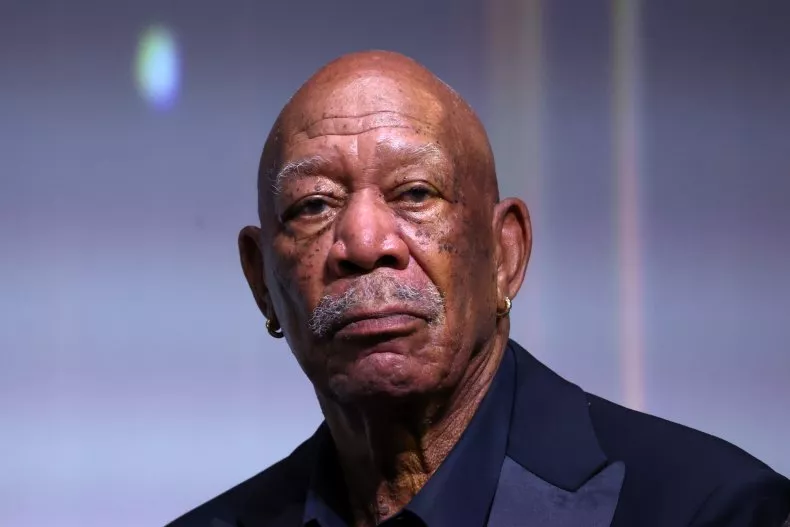

In [14]:
# read test image
from google.colab.patches import cv2_imshow
img_test = cv2.imread('/content/drive/MyDrive/A.0/2_Fast_Face_Recognition_System/test_images/morgan-freeman-looking-camera.webp')
cv2_imshow(img_test)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### step -2: Extract Feature

In [15]:
res_test = faceapp.get(img_test,max_num=1)
for i, rt in enumerate(res_test):
    print('current loop =',i)
    bbox = rt['bbox'].astype(int)
    score = int(rt['det_score']*100)
    embed_test = rt['embedding']


current loop = 0


In [ ]:
# consider only one sample
len(embed_test)

In [ ]:
embed_test

#### Algorithm

![algorithm.svg](attachment:algorithm.svg)

In [16]:
X_list =  dataframe['Facial_Features'].tolist()
X = np.asarray(X_list)

In [ ]:
X.shape

In [17]:
from sklearn.metrics import pairwise

In [18]:
y = embed_test.reshape(1,512) # 1 x 512

equlidean_distance = pairwise.euclidean_distances(X,y)
manhattan_distance = pairwise.manhattan_distances(X,y)
cosine_similar = pairwise.cosine_similarity(X,y)

In [19]:
data_search = dataframe.copy()
data_search['equlidean'] = equlidean_distance
data_search['manhattan'] = manhattan_distance
data_search['cosine'] = cosine_similar

In [ ]:
data_search.head(2)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.figure(figsize=(10,16))
plt.subplot(3,1,1)
plt.plot(data_search['equlidean'],)
plt.xticks(ticks=list(range(len(data_search['equlidean']))),
           labels=data_search['Name'],rotation=90)
plt.xlabel('Name of the Person')
plt.ylabel('Equlidean')
plt.title('Equlidean Distance')
plt.grid()

plt.subplot(3,1,2)
plt.plot(data_search['manhattan'],)
plt.xticks(ticks=list(range(len(data_search['manhattan']))),
           labels=data_search['Name'],rotation=90)
plt.xlabel('Name of the Person')
plt.ylabel('manhattan')
plt.title('Manhattan Distance')
plt.grid()


plt.subplot(3,1,3)
plt.plot(data_search['cosine'],)
plt.xticks(ticks=list(range(len(data_search['cosine']))),
           labels=data_search['Name'],rotation=90)
plt.xlabel('Name of the Person')
plt.ylabel('cosine')
plt.title('Cosine Similarity')
plt.grid()


plt.show()

### Identify the Person using Equlidean Distance

In [20]:
d_eq_optimal = 25

In [21]:
datafilter = data_search.query(f'equlidean < {d_eq_optimal}')
datafilter.reset_index(drop=True,inplace=True)

if len(datafilter) > 0:
    argmin = datafilter['equlidean'].argmin()
    name = datafilter.loc[argmin][['Name']]

else:
    name = 'Unknown'

In [22]:
print(name)

Unknown


### Identify the Person using Manhattan Distance

In [ ]:
d_man_optimal = 450

In [ ]:
datafilter = data_search.query(f'manhattan < {d_man_optimal}')
datafilter.reset_index(drop=True,inplace=True)

if len(datafilter) > 0:
    argmin = datafilter['manhattan'].argmin()
    name_man = datafilter.loc[argmin][['Name']]

else:
    name_man = 'Unknown'
    # role_man

In [ ]:
print(name)

### Identify the Person using Cosine Similarity

In [26]:
S_opt = 0.4

In [27]:
datafilter = data_search.query(f'cosine > {S_opt}')
datafilter.reset_index(drop=True,inplace=True)

if len(datafilter) > 0:
    argmax = datafilter['cosine'].argmax()
    name_cos= datafilter.loc[argmax][['Name']]

else:
    name_cos = 'Unknown'
    # role_cos = 'Unknown'

In [28]:
print(name_cos)

Unknown


In [ ]:
datafilter

### Identify Multiple Person in an Image

In [29]:
def ml_search_algorithm(dataframe,feature_column,test_vector,
                        name=['Name'],thresh=0.5):
    """
    cosine similarity base search algorithm
    """
    # step-1: take the dataframe (collection of data)
    dataframe = dataframe.copy()
    # step-2: Index face embeding from the dataframe and convert into array
    X_list = dataframe[feature_column].tolist()
    x = np.asarray(X_list)

    # step-3: Cal. cosine similarity
    similar = pairwise.cosine_similarity(x,test_vector.reshape(1,-1))
    similar_arr = np.array(similar).flatten()
    dataframe['cosine'] = similar_arr

    # step-4: filter the data
    data_filter = dataframe.query(f'cosine >= {thresh}')
    if len(data_filter) > 0:
        # step-5: get the person name
        data_filter.reset_index(drop=True,inplace=True)
        argmax = data_filter['cosine'].argmax()
        person_name = data_filter.loc[argmax][name]

    else:
        person_name = 'Unknown'
        # person_role = 'Unknown'

    return person_name

In [30]:
### didn't compress
# dataframe_compress = dataframe.groupby(by=['Name','Role']).mean()
# dataframe_compress.reset_index(inplace=True)
dataframe_compress = dataframe
dataframe_compress

,Name,Facial_Features
0,2020331001,"[0.1724171, 1.7741423, 2.481364, 0.783813, -1...."
1,2020331001,"[0.638482, 0.5910297, 1.111624, 0.649901, -1.3..."
2,2020331001,"[0.2712807, 1.0748663, 2.7635763, 0.208098, -2..."
3,2020331001,"[-0.47082588, -1.1298132, 1.5522764, 0.4085563..."
4,2020331001,"[-1.7879872, -0.22589833, 0.873205, -0.2449286..."
...,...,...
79,2020331023,"[1.1927994, -0.012420237, -0.637183, 0.3470512..."
80,2020331023,"[1.6561993, 0.4361199, -0.6215804, 0.87247765,..."
81,2020331023,"[0.6523438, 0.43294084, -1.3175133, 1.010988, ..."
82,2020331023,"[0.32308707, -0.25822735, -0.3183139, 1.395676..."


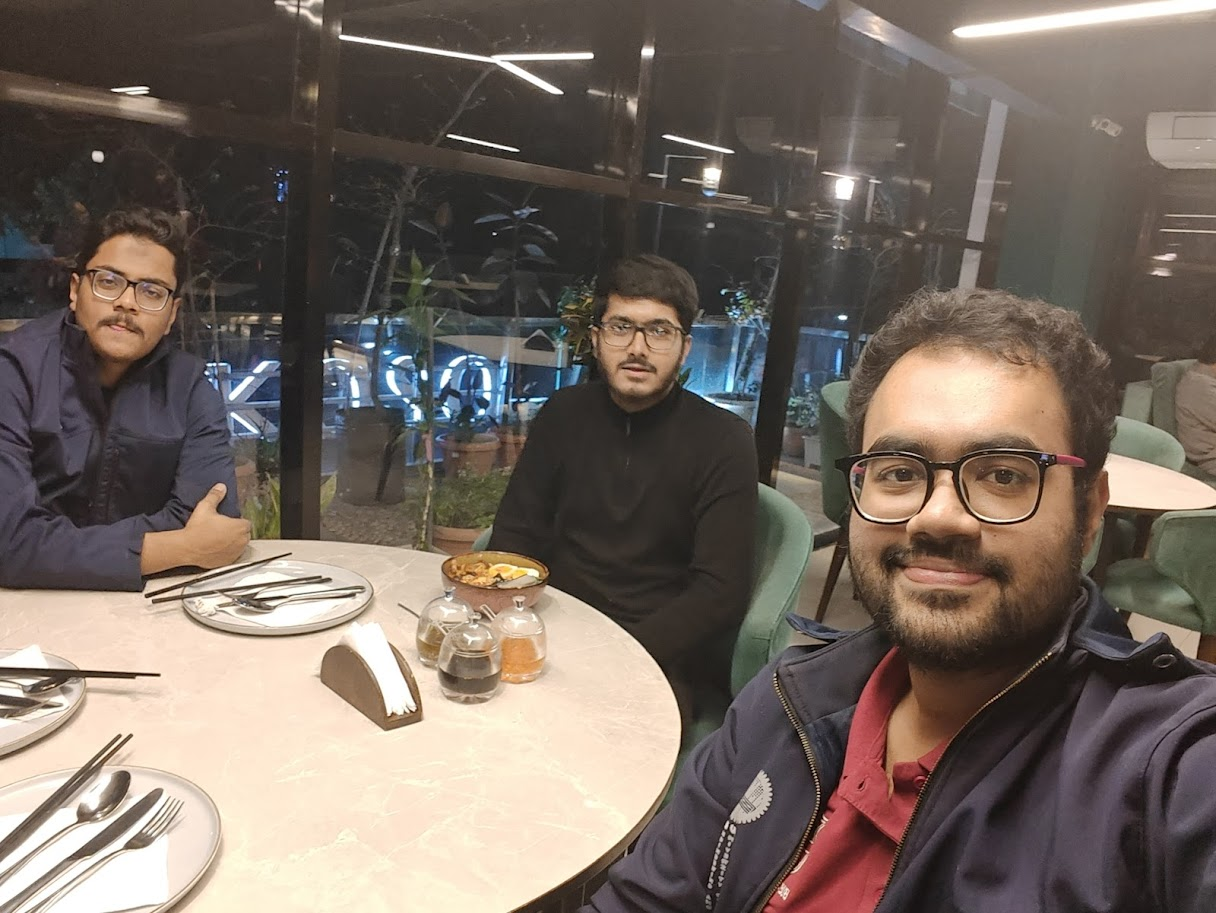

In [31]:
pptth = '/content/drive/MyDrive/A.0/2_Fast_Face_Recognition_System/test_images/IMG20241224181350.jpg'
test_image = cv2.imread(pptth)
cv2_imshow(test_image)
cv2.waitKey()
cv2.destroyAllWindows()

In [45]:
# step-1: take the test image and apply to insight face
results = faceapp.get(test_image)
# print(len(results))
# step-2: use for loop and extract each embedding and pass to ml_search_algorithm
identified_names = []
for res in results:
    embeddings = res['embedding']
    person_name = ml_search_algorithm(dataframe_compress,  # No need for person_role
                                       'Facial_Features',
                                       test_vector=embeddings,
                                       name=['Name'],
                                       thresh=0.5)
    if isinstance(person_name, pd.Series):
        # Extract the name as a string from the Series
        name_str = person_name.values[0]  # or person_name.iloc[0]
    else:
        # If it's already a string, use it directly
        name_str = person_name

    # Append to the list
    if name_str!= "Unknown":
        identified_names.append(name_str)



print(identified_names)
# print("       ")
    # print(person_name) # Just print the name

3
['2020331097', '2020331023']


### Compressing my dataset

#### convert dataframe into array and save in numpy zip format

In [ ]:
xvalues = dataframe_compress.values
xvalues

In [34]:
col_name = np.array(dataframe_compress.columns)
col_name

array(['Name', 'Facial_Features'], dtype=object)

In [35]:
np.savez('dataframe_buffalo_sc.npz',xvalues,col_name)

In [36]:
# load the numpy zip
file_np = np.load('dataframe_buffalo_sc.npz',allow_pickle=True)
file_np.files

['arr_0', 'arr_1']

In [37]:
pd.DataFrame(file_np['arr_0'],columns=file_np['arr_1'])

,Name,Facial_Features
0,2020331001,"[0.1724171, 1.7741423, 2.481364, 0.783813, -1...."
1,2020331001,"[0.638482, 0.5910297, 1.111624, 0.649901, -1.3..."
2,2020331001,"[0.2712807, 1.0748663, 2.7635763, 0.208098, -2..."
3,2020331001,"[-0.47082588, -1.1298132, 1.5522764, 0.4085563..."
4,2020331001,"[-1.7879872, -0.22589833, 0.873205, -0.2449286..."
...,...,...
79,2020331023,"[1.1927994, -0.012420237, -0.637183, 0.3470512..."
80,2020331023,"[1.6561993, 0.4361199, -0.6215804, 0.87247765,..."
81,2020331023,"[0.6523438, 0.43294084, -1.3175133, 1.010988, ..."
82,2020331023,"[0.32308707, -0.25822735, -0.3183139, 1.395676..."


In [38]:

# Load the NPZ file
file_np = np.load('dataframe_buffalo_sc.npz', allow_pickle=True)
dataframe = pd.DataFrame(file_np['arr_0'], columns=file_np['arr_1'])
faceapp.prepare(ctx_id=0, det_size=(640, 640), det_thresh=0.5)


set det-size: (640, 640)


### [END](https://www.udemy.com/user/freeai-space/)
---

In [39]:
# # step-1: take the test image and apply to insight face
# results = faceapp.get(test_image)
# test_copy = test_image.copy()
# # step-2: use for loop and extract each embedding and pass to ml_search_algorithm

# for res in results:
#     x1, y1, x2, y2 = res['bbox'].astype(int)
#     embeddings = res['embedding']
#     person_name = ml_search_algorithm(dataframe_compress,
#                                                    'Facial_Features',
#                                                    test_vector=embeddings,
#                                                    name=['Name'],
#                                                    thresh=0.5)
#     if person_name == 'Unknown':
#         color =(0,0,255) # bgr
#     else:
#         color = (0,255,0)


#     cv2.rectangle(test_copy,(x1,y1),(x2,y2),color)

#     text_gen = person_name
#     cv2.putText(test_copy,text_gen,(x1,y1),cv2.FONT_HERSHEY_DUPLEX,0.7,color,2)


# cv2_imshow(test_copy)
# cv2.waitKey()
# cv2.destroyAllWindows()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')